#### Module Importation

In [29]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Helper Functions

# Import Dataframe

In [30]:
df=pd.read_csv('train.csv',index_col='Id')

# Defintion of Continuous, Ordinal and Nominal Categories

In [31]:
df_number = df.select_dtypes(include = 'number')
df_object = df.select_dtypes(include = 'object')
df_category = df.select_dtypes(include = 'category')
df_boolean = df.select_dtypes(include = 'bool')
df_datetime = df.select_dtypes(include = 'datetime')
df_timedelta = df.select_dtypes(include = 'timedelta')

nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

# Scatter Plots for Continuous Variables

<Figure size 504x504 with 0 Axes>

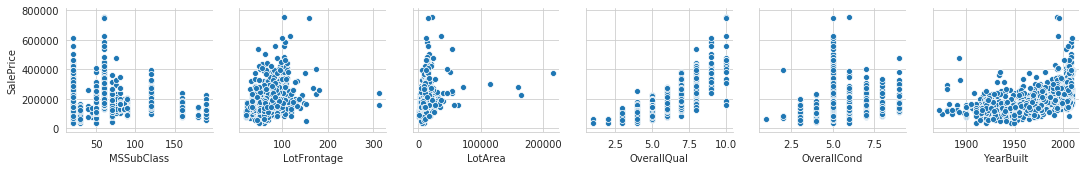

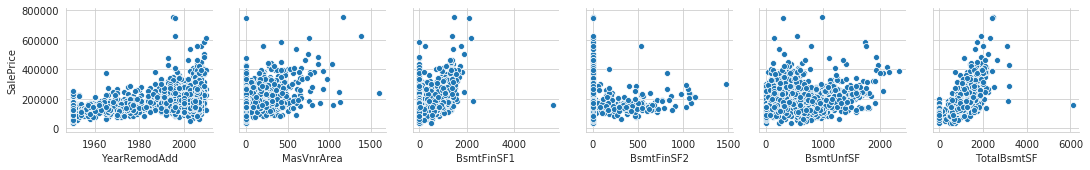

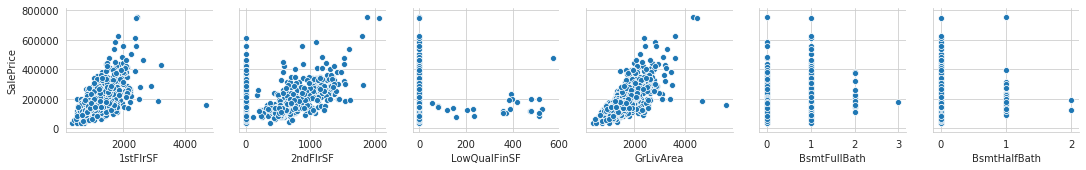

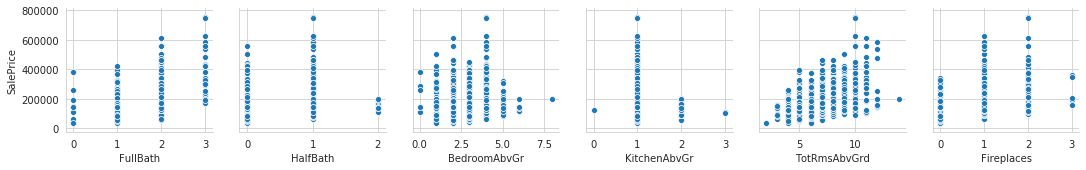

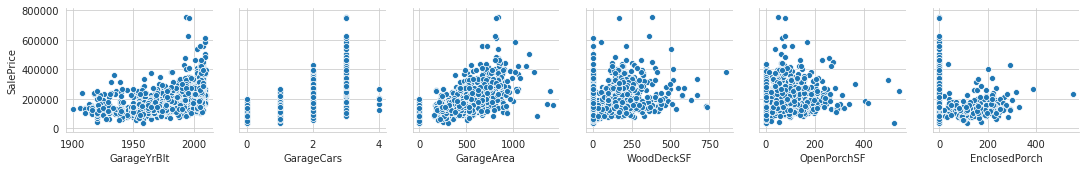

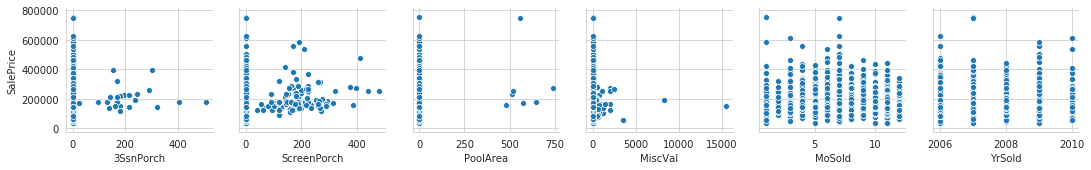

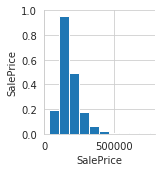

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
for i in range(0, len(df[continuous_var].columns), 6):
    sns.pairplot(data=df[continuous_var],
                x_vars=df[continuous_var].columns[i:i+6],
                y_vars=['SalePrice'])

# Scatter Plots for Continuous Variables with Linear Fit

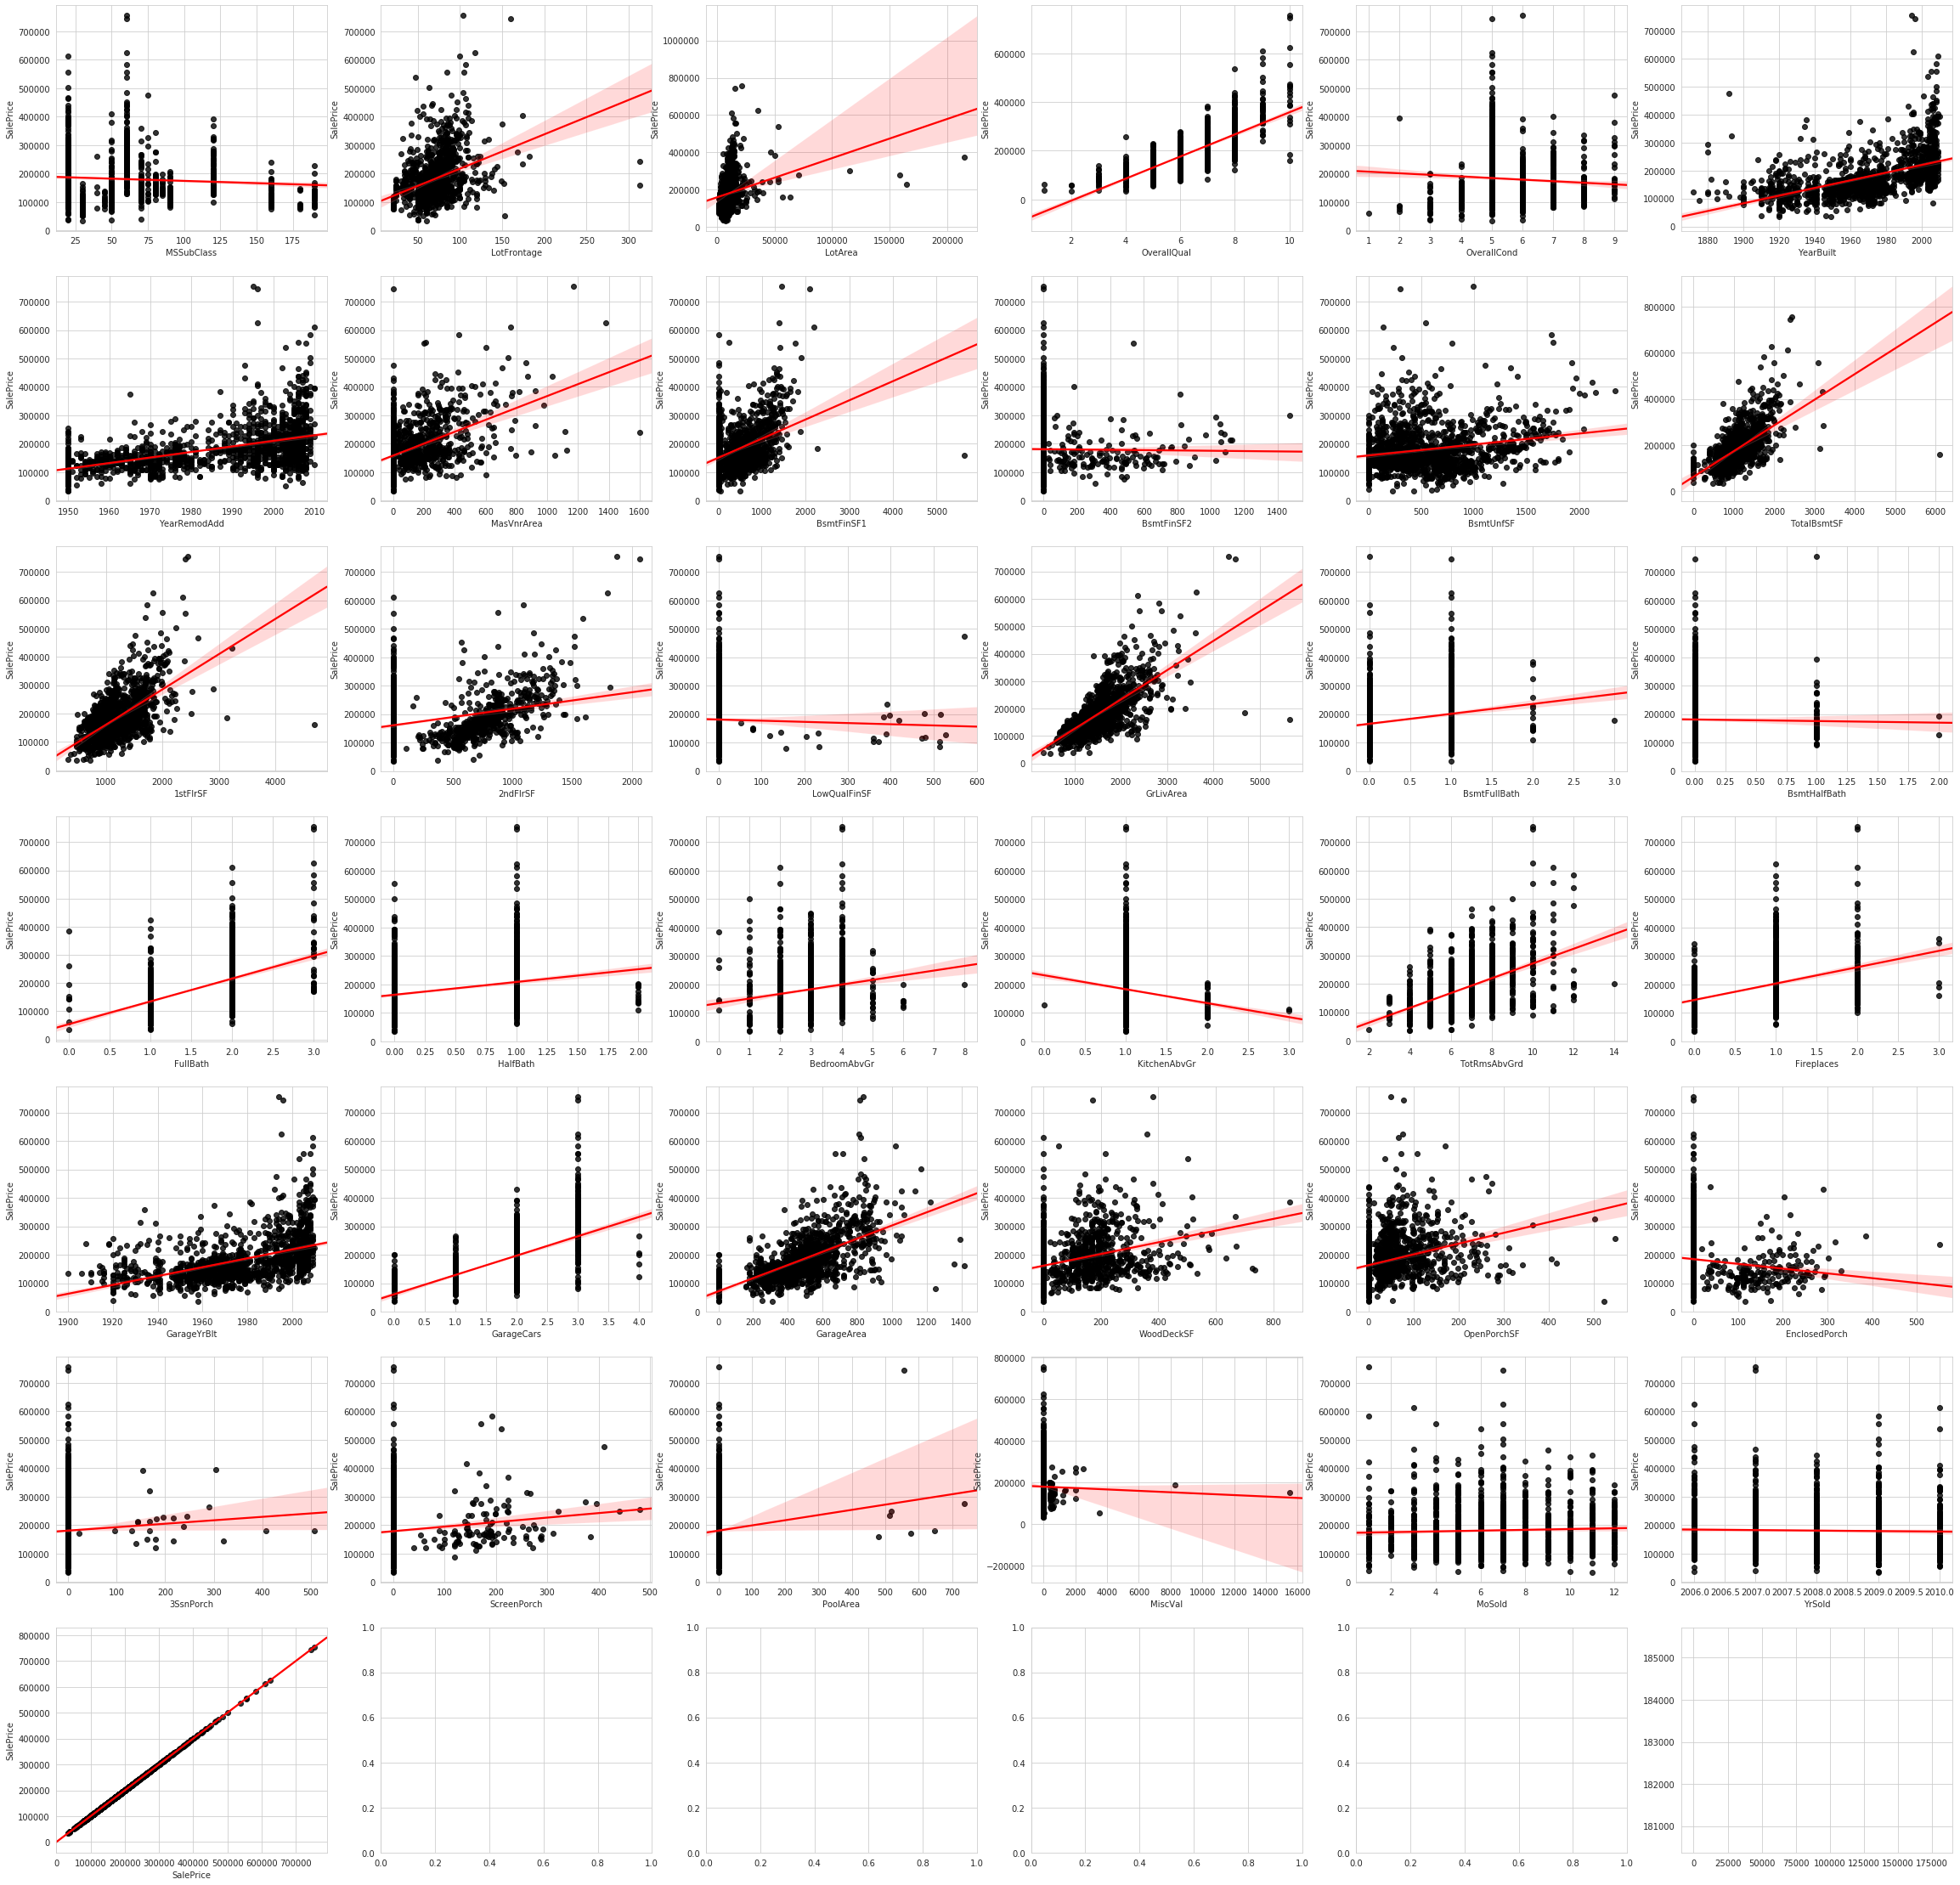

In [42]:
sns.set_style("whitegrid")
fig,ax=plt.subplots(math.ceil(len(continuous_var)/6),6,figsize=(40,40))
ax=ax.flatten()
for ind,col in enumerate(df[continuous_var]):
    sns.regplot(x=df[col],y=df['SalePrice'],\
                scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=ax[ind])

# Box Plots for Nominal Variables

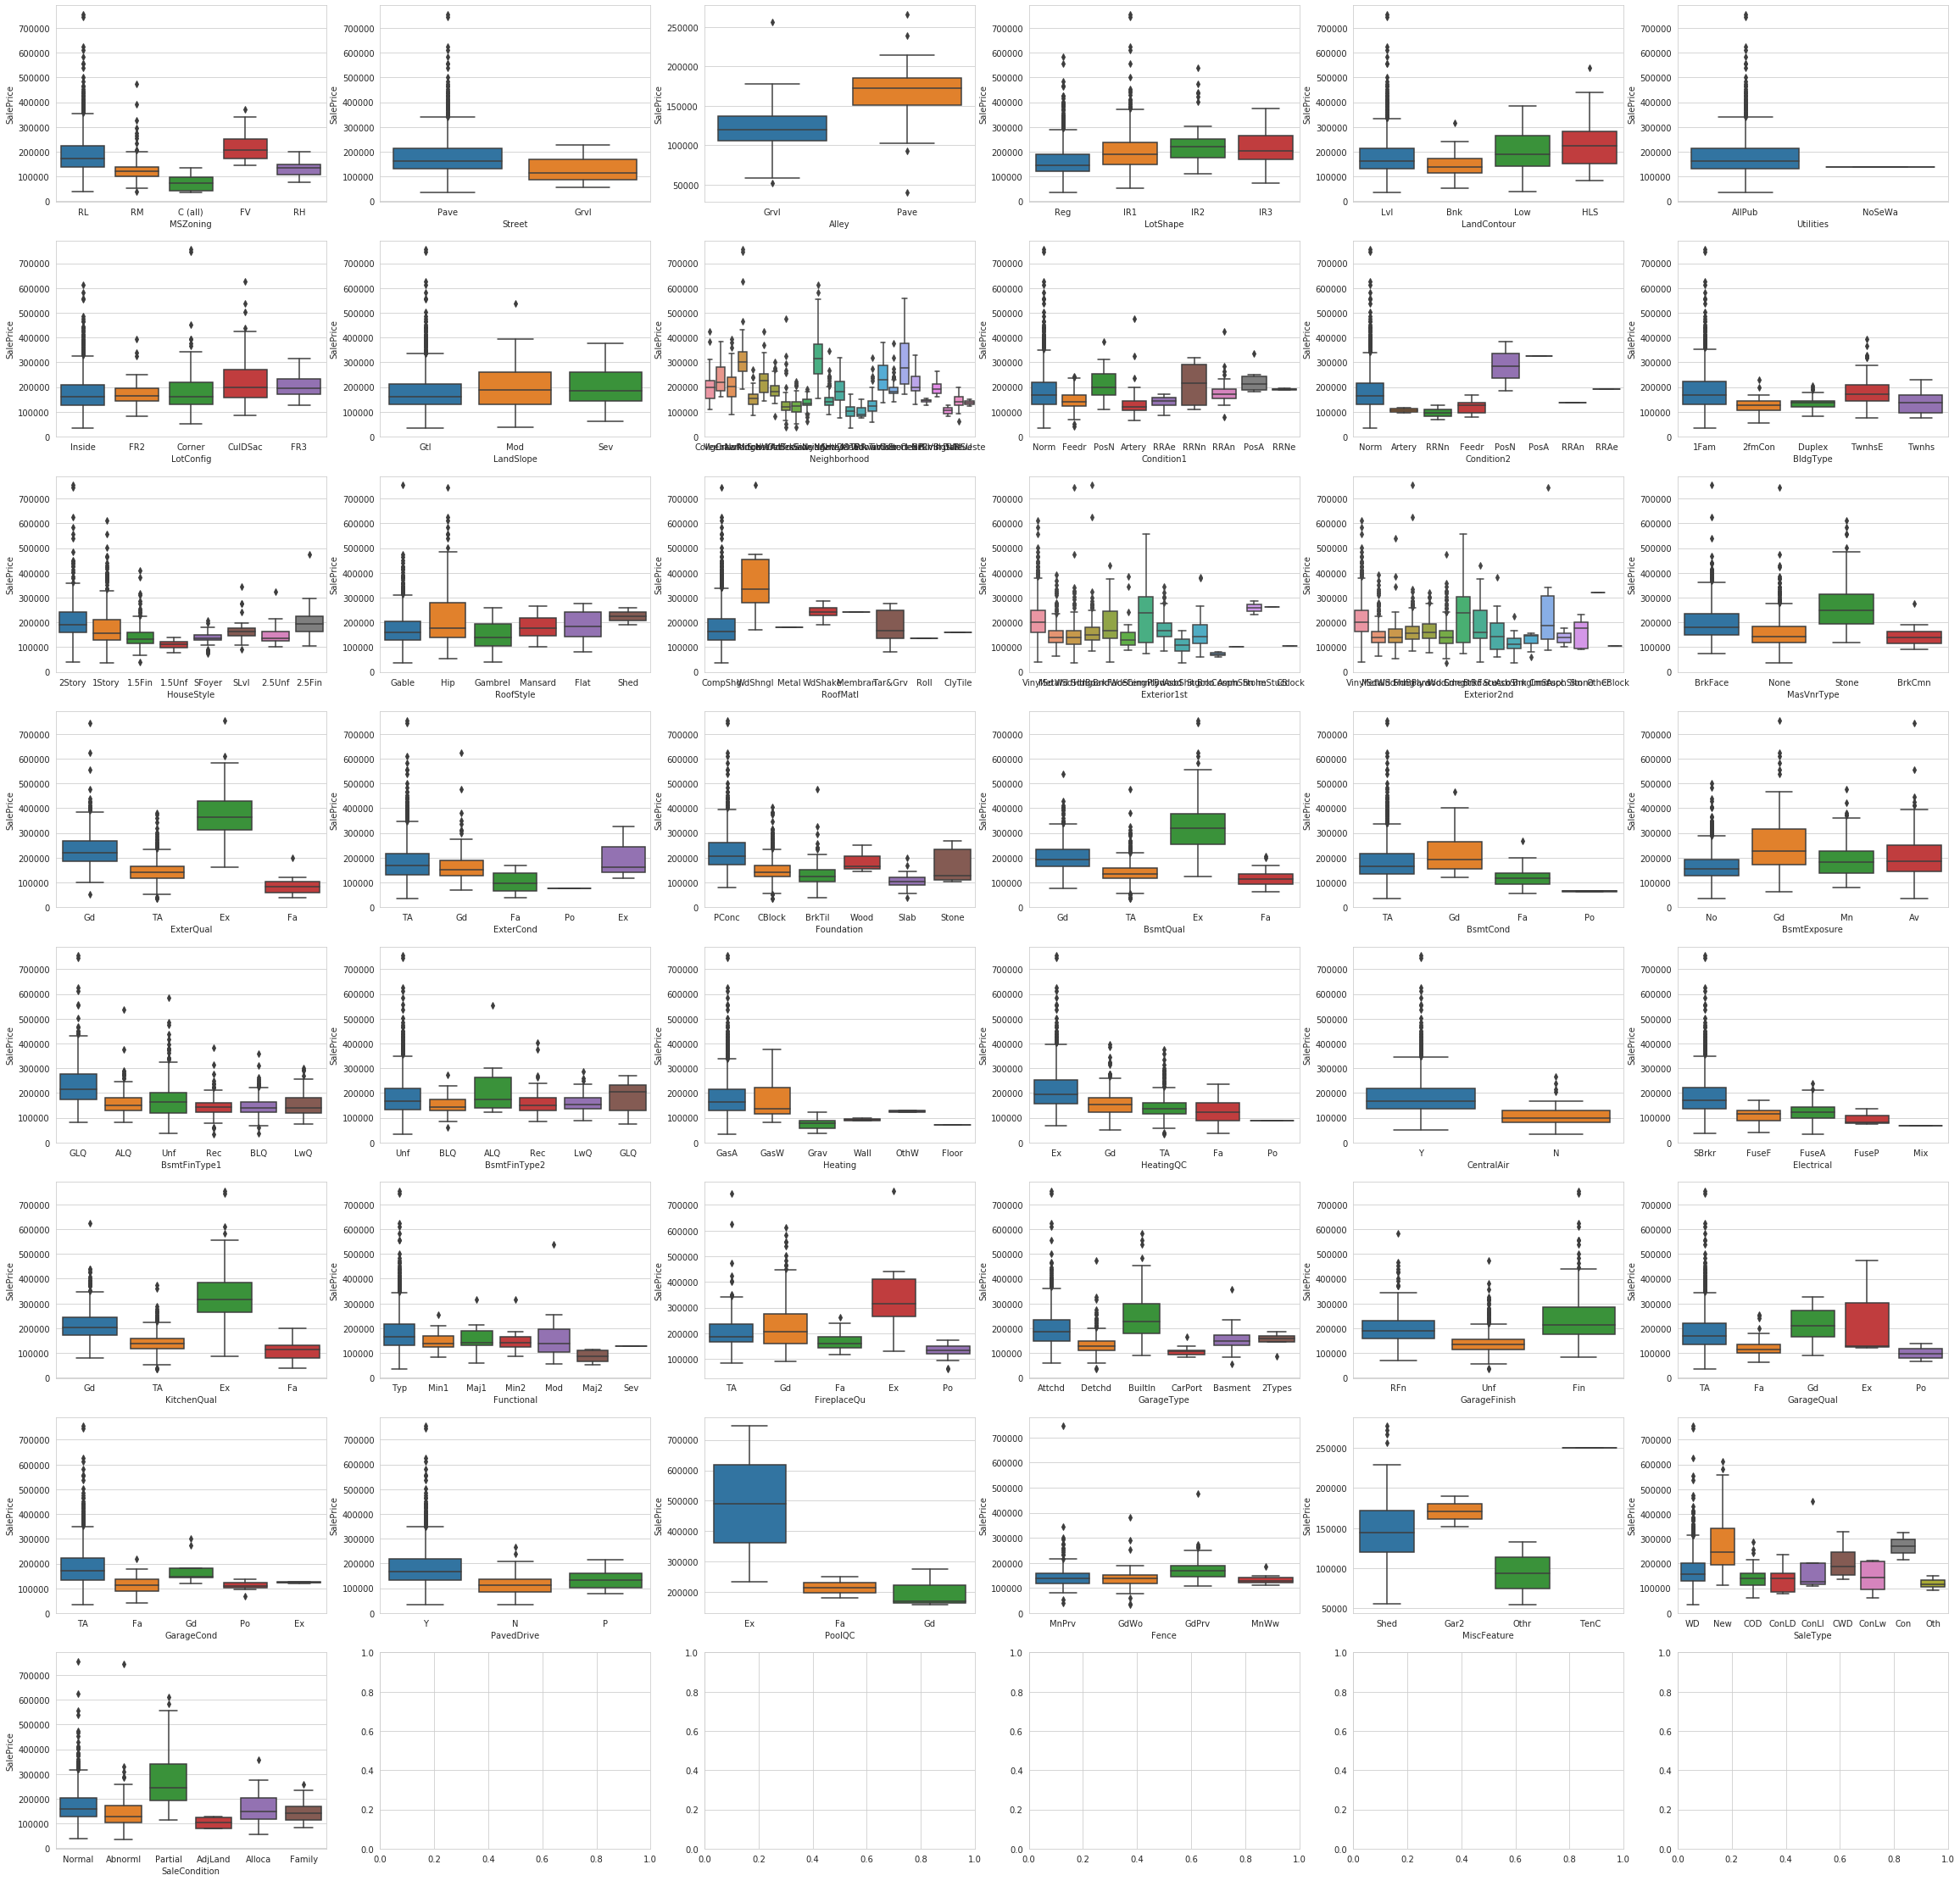

In [40]:
fig,ax=plt.subplots(math.ceil(len(nominal_var)/6),6,figsize=(40,40))
ax=ax.flatten()
for ind, col in enumerate(df[nominal_var]):
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    fig = sns.boxplot(x=col, y="SalePrice", data=data,ax=ax[ind])

# Count Plots for Nominal Variables

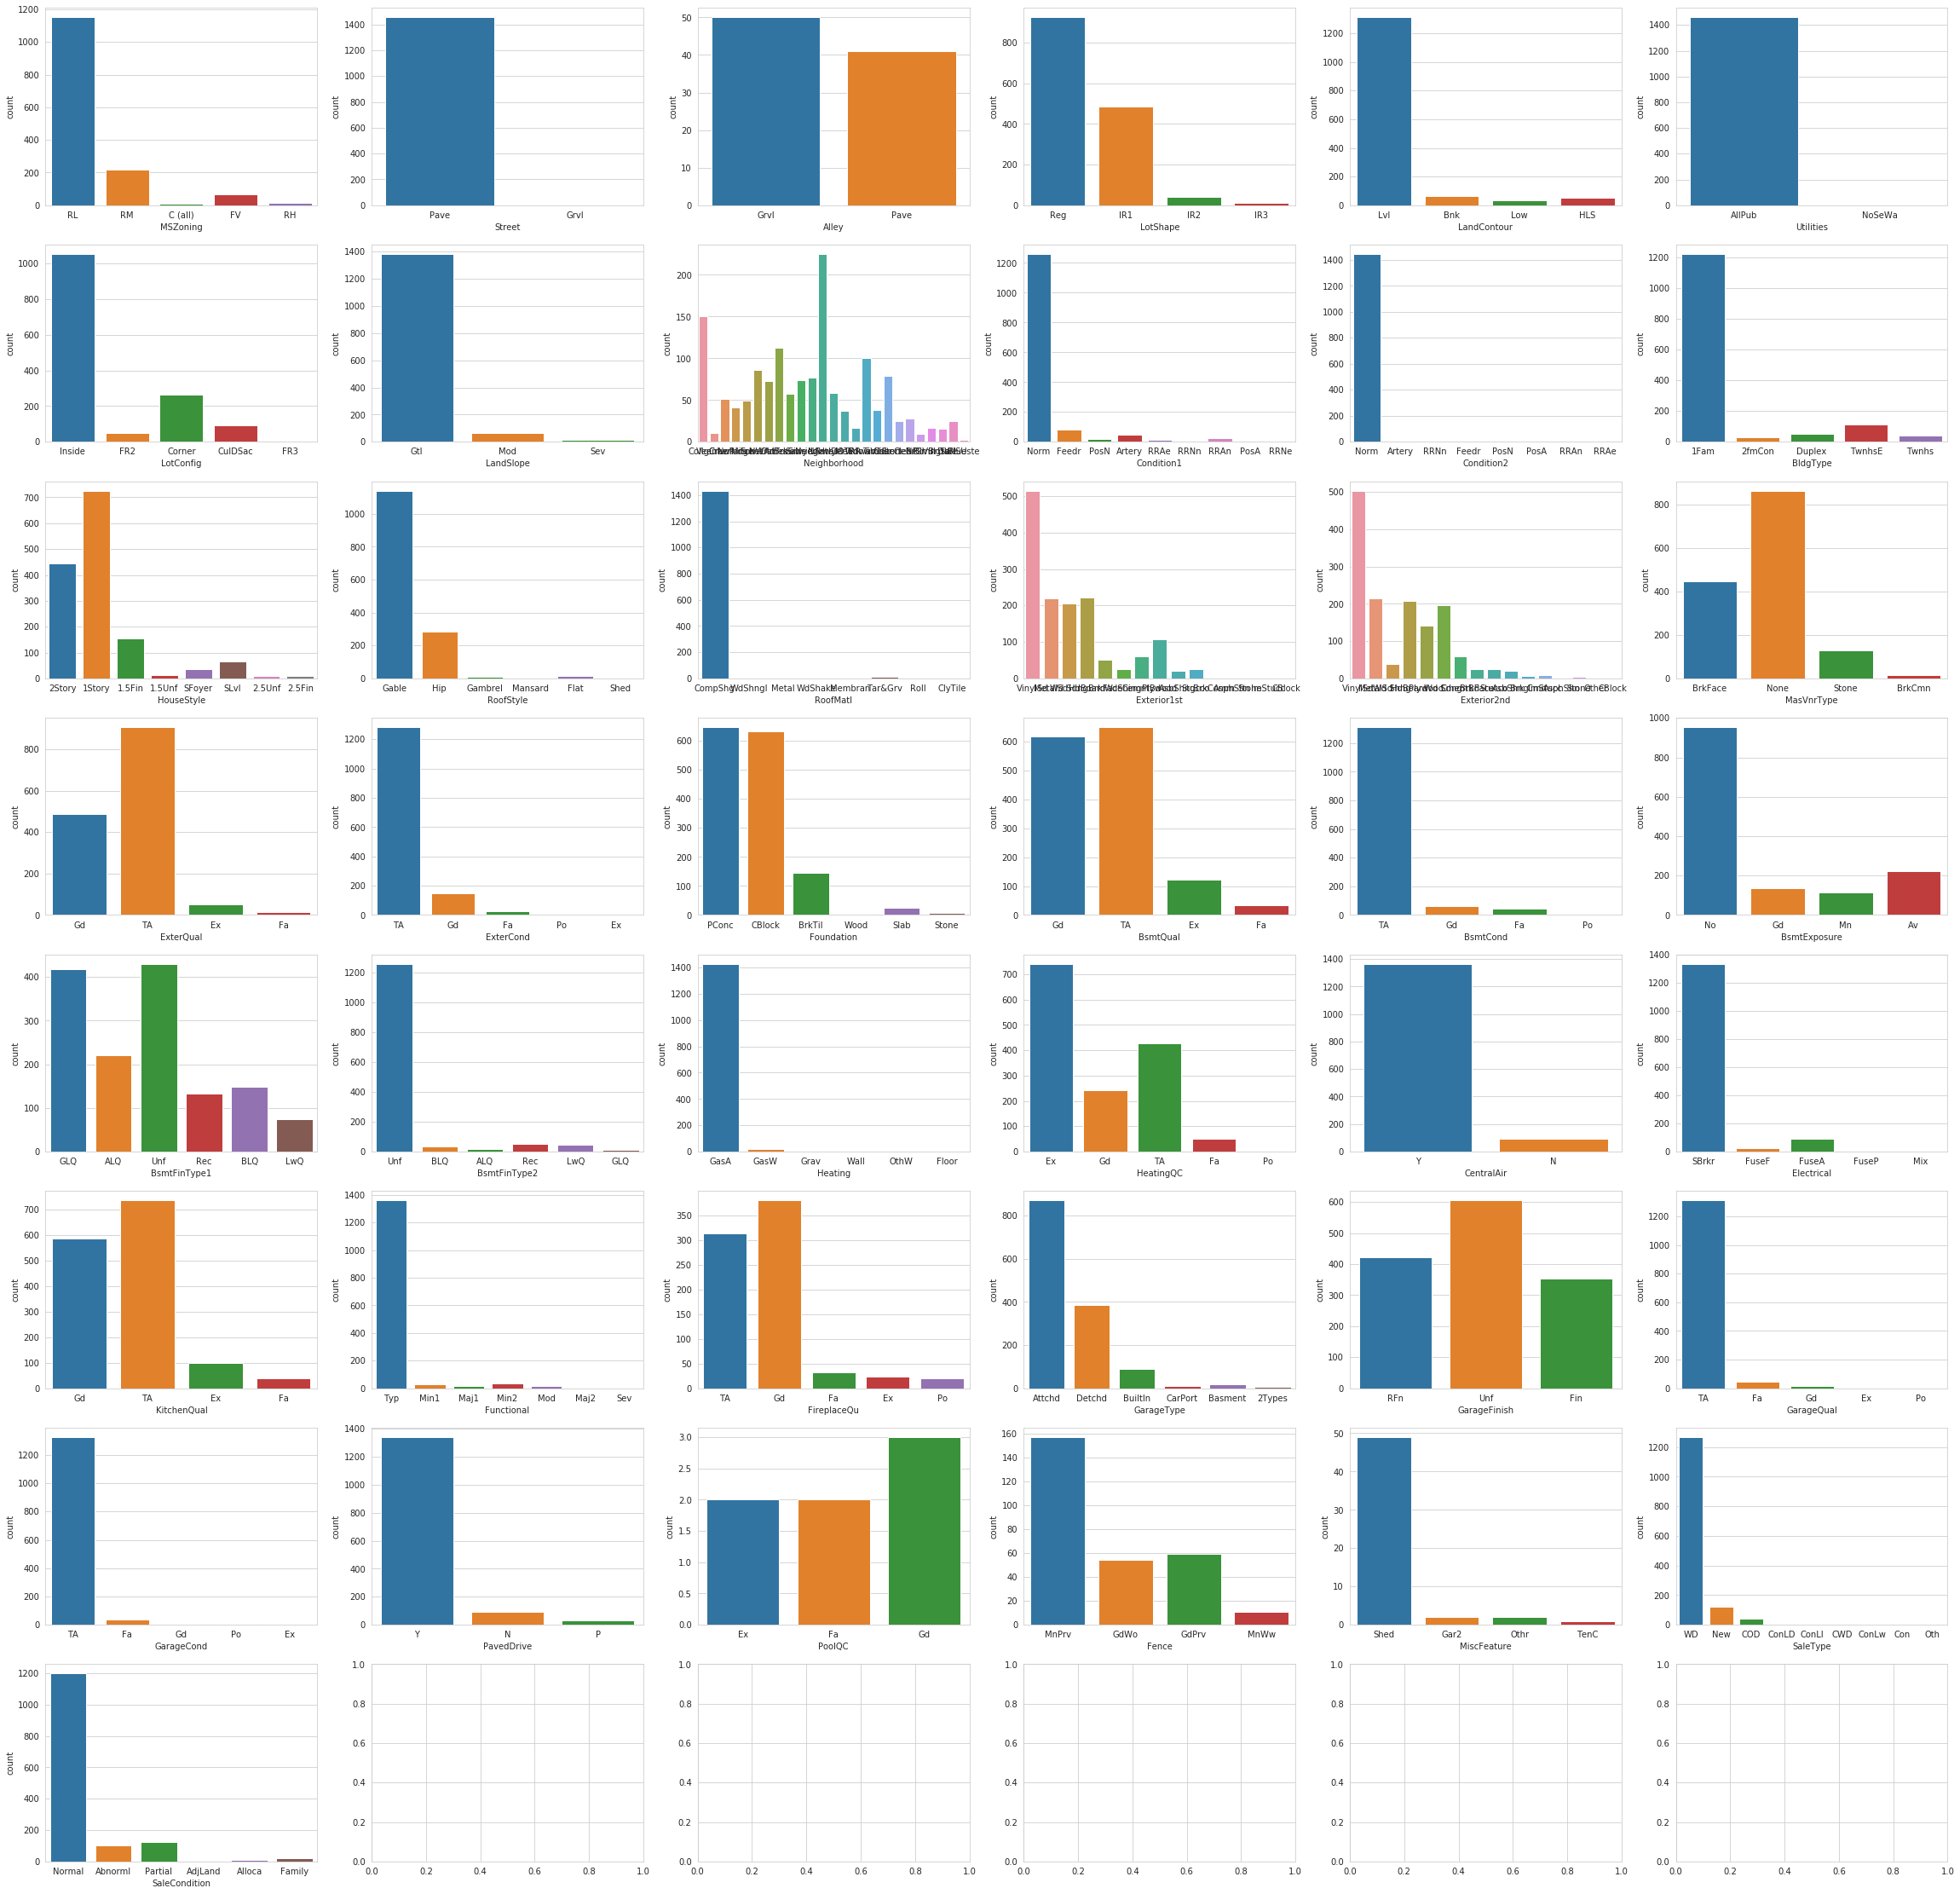

In [41]:
# For finding subcategories with low representation
fig,ax=plt.subplots(math.ceil(len(nominal_var)/6),6,figsize=(40,40))
ax=ax.flatten()
for ind, col in enumerate(df[nominal_var]):
    sns.countplot(df[col],ax=ax[ind])

# Grouped-by Box Plots with Hierarchy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

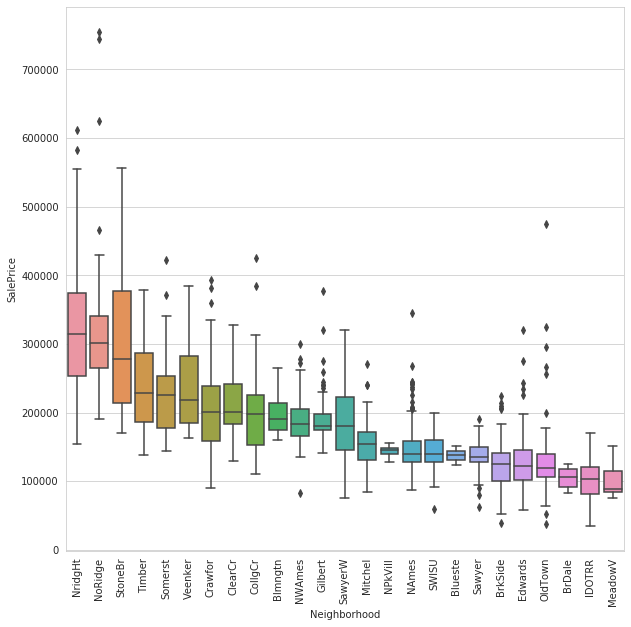

In [46]:
plt.figure(figsize=(10,10))
result = df.groupby(["Neighborhood"])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice',ascending=False)
sns.boxplot(x='Neighborhood',y='SalePrice',data=df,order=result['Neighborhood'])
plt.xticks(rotation=90)

# Scatter Plots for Subcategories of a Category

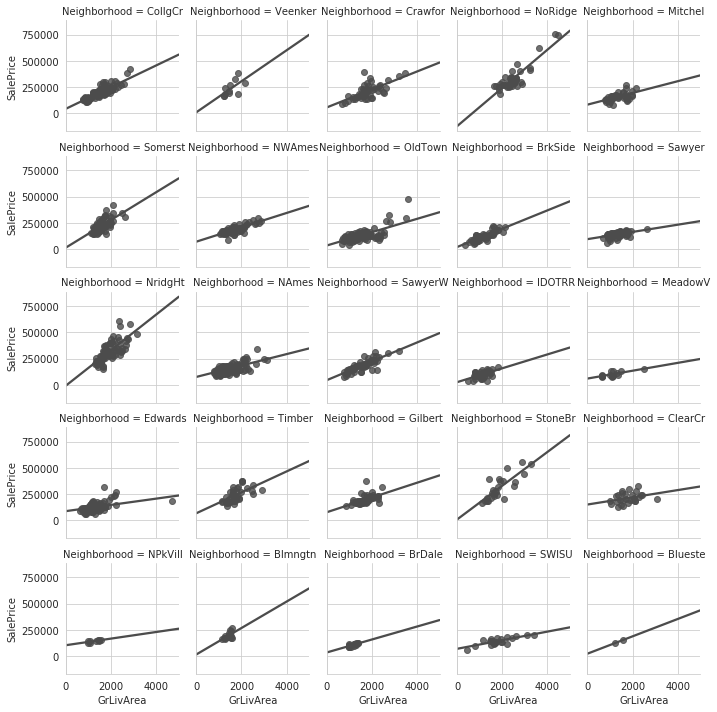

In [50]:
g = sns.FacetGrid(df, col="Neighborhood", col_wrap=5, height=2,xlim=[0,5000])
g.map(sns.regplot, "GrLivArea", "SalePrice", color=".3", ci=None);